#**Modelo de Procesamiento Distribuido**
#####Gestión de Datos, Maestría en Ciencia de Datos
#####Pontificia Universidad Javeriana Cali

Carlos Rodrigo Piñeros, Juan Restrepo Rosero y Joel Doria Atencia

###**¿Qué es el Procesamiento Distribuido?**
El procesamiento distribuido es una técnica que divide grandes conjuntos de datos en partes más pequeñas y las procesa en múltiples computadoras o nodos de un clúster. Esto permite analizar datos masivos de manera más rápida y eficiente que en un solo equipo.

**Hadoop y Spark**: Los Gigantes del Procesamiento Distribuido
Hadoop y Spark son dos de las plataformas más populares para el procesamiento distribuido de grandes volúmenes de datos (Big Data). Aunque comparten el objetivo de procesar datos a gran escala, tienen características y enfoques diferentes.

**Hadoop**
- Almacenamiento a largo plazo de grandes volúmenes de datos.
- Procesamiento por lotes de datos históricos.
- Análisis de datos sin requisitos de tiempo real.

**Spark**
- Procesamiento en tiempo real de flujos de datos.
- Machine learning a gran escala.
- Análisis interactivo y exploratorio de datos.
- Procesamiento de gráficos.


#Caso Conteo de Palabras
Imaginen que un profesional está realizando una investigación sobre determinado tema de su interés y quiere saber cuántas veces aparecen determinadas palabras en una publicación de caracter científico que piensa utilizar a modo de referencia bibliográfica en su propio trabajo investigativo. Teniendo en cuenta que el artículo puede llegar
a tener entre 15 y 20 páginas, sería complicado para el
investigador contar por sí mismo las palabras, por lo que desea usar una herramienta que le permita procesar el texto y realizar el conteo en un menor tiempo.

Hadoop o Spark, utiliza un
Modelo de Procesamiento Distribuido distinto y goza de ciertas características,
por lo que deben analizar cómo realizar el conteo de palabras y seleccionar la
herramienta que mejor se ajuste al caso propuesto. Adicionalmente,
considerar lo siguiente:
1. Buscar un artículo científico de su interés de entre 10 a 20 páginas. El
texto de este artículo es el que usarán junto a Hadoop o Spark para
realizar el conteo de palabras.
2. El conteo de palabras se debe realizar sobre la totalidad del texto que
compone el artículo.
3. El artículo debe estar en idioma español pues la idea es hacer
comparaciones para dicho idioma.
4. El resultado del conteo de palabras debe tener una estructura similar a la que se presenta a continuación:
sigamos, 1
aprendiendo, 7
sobre, 4
la, 20
gestión, 5
de, 15
datos, 5


#**Desarrollo**

PySpark es una combinación poderosa de Python y Apache Spark, que te permite realizar análisis de datos a gran escala de manera eficiente. Es una herramienta esencial para trabajar con grandes volúmenes de datos distribuidos en clústeres.

Combina la facilidad de uso de Python con la potencia de Spark para procesar datos distribuidos.

PyPDF2 es una biblioteca de Python que te permite interactuar con archivos PDF de manera programática. Esto significa que puedes leer, modificar y crear archivos PDF directamente desde tu código Python.

¿Qué puedes hacer con PyPDF2?

Extraer texto: Puedes extraer todo el texto de un PDF o seleccionar partes específicas.
Combinar archivos PDF: Junta múltiples archivos PDF en uno solo.
Dividir archivos PDF: Separa un archivo PDF en múltiples archivos más pequeños.
Rotar páginas: Gira las páginas de un PDF.
Agregar o eliminar páginas: Modifica la estructura de un PDF.
Agregar marcas de agua: Incorpora imágenes o texto como marcas de agua.
Encriptar y desencriptar: Protege tus documentos PDF con contraseñas.

In [ ]:
# prompt: contar palabras de un archivo pdf usando python y spark

!pip install pyspark
!pip install PyPDF2

from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split, lower, col
import PyPDF2


# Inicializar SparkSession
spark = SparkSession.builder.appName("CountWordsPDF").getOrCreate()

# Función para extraer texto de un archivo PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            for page in pdf_reader.pages:
                text += page.extract_text()
    except FileNotFoundError:
        print(f"Error: File not found at {pdf_path}")
        return ""  # Return empty string if file not found
    except Exception as e:
        print(f"Error processing PDF: {e}")
        return ""  # Return empty string for other errors
    return text

# Ruta al archivo PDF
pdf_file_path = "colombiaint-3824.pdf" # Reemplaza con la ruta a tu archivo

# Extraer texto del PDF
pdf_text = extract_text_from_pdf(pdf_file_path)

# Crear un DataFrame con el texto
if pdf_text:
    data = [(pdf_text,)]
    df = spark.createDataFrame(data, ["text"])

    # Dividir el texto en palabras
    words_df = df.select(explode(split(lower(col("text")), "\s+")).alias("word"))

    # Contar las palabras
    word_counts = words_df.groupBy("word").count().orderBy(col("count").desc())

    # Mostrar los resultados
    word_counts.show(50, truncate=False)
else:
    print("No se pudo extraer texto del archivo PDF. Verifica la ruta del archivo y los permisos.")

# Detener la SparkSession
spark.stop()

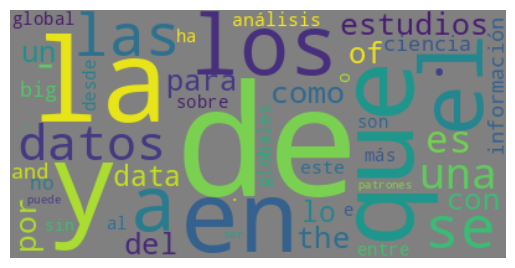

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Datos de frecuencia de palabras (ajusta según tu conteo)
word_freq = {
    'de': 641,
'la': 314,
'y': 305,
'que': 249,
'en': 228,
'el': 169,
'los': 169,
'a': 142,
'las': 133,
'se': 132,
'datos': 117,
'una': 85,
'-': 70,
'es': 66,
'estudios': 62,
'por': 61,
'como': 61,
'of': 57,
'del': 56,
'•': 54,
'para': 52,
'con': 51,
'the': 50,
'un': 50,
'data': 49,
'lo': 48,
'ciencia': 47,
'información': 47,
'and': 45,
'big': 45,
'no': 42,
'análisis': 40,
'este': 38,
'al': 35,
'más': 35,
'global': 33,
'sobre': 31,
'globales': 30,
'.': 29,
'e': 29,
'son': 27,
'o': 26,
'entre': 25,
'ha': 25,
'desde': 25,
'sin': 23,
',': 23,
'patrones': 22,
'puede': 21,
'ser': 21,
}

# Crear una instancia de WordCloud
wordcloud = WordCloud(background_color="gray", colormap='viridis').generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Primeras Observaciones**

A partir de resultados obtenidos, se tienen las siguientes observaciones:

**Determinantes y Conectores**: Las palabras "de", "la", "que", "en", "el", "los", "las", "se" y "un" dominan la lista. Esto es típico en el español, ya que estas palabras son fundamentales para la gramática y aparecen con frecuencia en cualquier texto.

**Temática**: La presencia de palabras como "datos", "información", "análisis", "ciencia", "global" sugiere que el texto analizado está fuertemente relacionado con temas de ciencia de datos, análisis de información o investigación académica.

**Palabras en inglés**: La aparición de palabras en inglés como "of", "data", "big", "and" indica que el texto podría ser un documento técnico o académico que combina terminología en español e inglés.

**Verbos**: Verbos como "es", "ser", "tener" (aunque no aparece en esta muestra) suelen aparecer con frecuencia, pero en este caso específico, la muestra podría estar sesgada hacia un tipo de texto en particular.


##¿Concuerda el resultado dado por la herramienta con las palabras más utilizadas en el idioma español?

No necesariamente concuerda con las listas más comunes de palabras en español.

Aunque algunas palabras como "de", "la", "que", "el", "los" y "las" son claramente las más frecuentes en el español general, los resultados obtenidos tienen una fuerte influencia de términos técnicos o relacionados con el análisis de datos o la ciencia de datos, tematica a la que se refiere el artículo seleccionado.

#**Conclusión**
Hadoop y Spark son herramientas poderosas para el procesamiento de grandes volúmenes de datos. La elección entre ambas dependerá de las necesidades específicas de tu proyecto. Al comprender las fortalezas y debilidades de cada una, podrás tomar una decisión informada y seleccionar la herramienta más adecuada para tus objetivos.

